<a href="https://colab.research.google.com/github/sugibuchiyuki/web-2024-2/blob/main/%E7%B5%90%E5%A9%9A%E7%8E%87%E9%9B%A2%E5%A9%9A%E7%8E%87%E3%81%A8%E6%B0%97%E8%B1%A1%E7%8A%B6%E6%B3%81%E3%81%AE%E7%9B%B8%E9%96%A2%E9%96%A2%E4%BF%82(%E6%9C%AA%E5%AE%8C%E6%88%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title ライブラリのインポート (一番最初にこのセルを実行してください)

# ライブラリのインストール
!pip install japanize_matplotlib

# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
# as を使うとライブラリを省略して(あだ名で)呼び出せる
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set() # seaborn のグラフのデフォルトを使用

# bokeh
from bokeh.plotting import figure, output_notebook, show
output_notebook() # 出力先をノートブック上に設定

# matplotlib で日本語を利用する
import japanize_matplotlib
%matplotlib inline

# 小数第3位まで表示
%precision 3

# Colab の出力画面のコントロールするためのライブラリ
from IPython.display import clear_output
# 出力画面を消去する
clear_output()
print("Successfully initialized this noteboook!")

Successfully initialized this noteboook!


In [3]:
import requests
import os

def download_file(url):
    # URLからファイルをダウンロード
    response = requests.get(url)
    response.raise_for_status()  # ダウンロードが成功したか確認
    # ファイル名を取得
    filename=os.path.basename(url)
    # ダウンロードしたファイルを保存
    with open(filename, 'wb') as file:
        file.write(response.content)

    # ファイルネームを返す
    return filename

# SSDSE のデータを取得
url = 'https://www.nstac.go.jp/sys/files/SSDSE-F-2023v2.xlsx'
filename = download_file(url)

In [4]:
df = pd.read_excel(filename, header=1, index_col=0)
df.head()

,都道府県,市,月・年,平均気温,日最高気温の平均,日最低気温の平均,日平均気温0℃未満の日数,日平均気温25℃以上の日数,日最高気温0℃未満の日数,日最高気温25℃以上の日数,...,降雪量日合計10cm以上の日数,降雪量日合計20cm以上の日数,最深積雪,日最深積雪5cm以上の日数,日最深積雪10cm以上の日数,日最深積雪20cm以上の日数,日最深積雪50cm以上の日数,緯度,経度,標高
地域コード,,,,,,,,,,,,,,,,,,,,,
R01100,北海道,札幌市,01月,-3.2,-0.4,-6.4,27.2,0.0,16.7,0.0,...,4.7,1.3,76,30.9,30.5,29.5,17.3,43.06,141.33,17.4
R01100,北海道,札幌市,02月,-2.7,0.4,-6.2,22.7,0.0,13.3,0.0,...,4.0,1.0,95,28.3,28.3,28.3,26.0,43.06,141.33,17.4
R01100,北海道,札幌市,03月,1.1,4.5,-2.4,11.4,0.0,3.2,0.0,...,2.0,0.3,82,29.0,28.4,26.8,18.7,43.06,141.33,17.4
R01100,北海道,札幌市,04月,7.3,11.7,3.4,0.2,0.0,0.0,0.2,...,0.1,0.0,22,4.1,3.6,2.7,0.8,43.06,141.33,17.4
R01100,北海道,札幌市,05月,13.0,17.9,9.0,0.0,0.0,0.0,2.1,...,0.0,0.0,0,0.0,0.0,0.0,0.0,43.06,141.33,17.4


In [5]:
filtered_rows = df[df['月・年'].str.contains('年')]
print(filtered_rows[['都道府県', '月・年', '日照時間の合計', '降水量の合計', '降雪量の合計']])

        都道府県 月・年  日照時間の合計  降水量の合計  降雪量の合計
地域コード                                    
R01100   北海道   年   1718.0  1146.1     479
R02201   青森県   年   1589.2  1350.7     567
R03201   岩手県   年   1686.3  1279.9     209
R04100   宮城県   年   1836.9  1276.7      59
R05201   秋田県   年   1527.4  1741.6     273
R06201   山形県   年   1617.9  1206.7     285
R07201   福島県   年   1753.8  1207.0     122
R08201   茨城県   年   2000.8  1367.7      12
R09201   栃木県   年   1961.1  1524.7      18
R10201   群馬県   年   2153.7  1247.4      19
R11202   埼玉県   年   2106.6  1305.8      16
R12100   千葉県   年   1945.5  1454.7       7
R13100   東京都   年   1926.7  1598.2       8
R14100  神奈川県   年   2018.3  1730.8       9
R15100   新潟県   年   1639.6  1845.9     139
R16201   富山県   年   1647.2  2374.2     253
R17201   石川県   年   1714.1  2401.5     157
R18201   福井県   年   1653.7  2299.6     186
R19201   山梨県   年   2225.8  1160.7      23
R20201   長野県   年   1969.9   965.1     163
R21201   岐阜県   年   2108.6  1860.7      34
R22100   静岡県   年   2151.5  2327.3 

変更点1 **すべての都道府県で表示するようにしました**

In [6]:
filtered_rows = df[df['月・年'].str.contains('年') & df['都道府県'].str.contains('北海道|青森県|岩手県|宮城県|秋田県|山形県|福島県|茨城県|栃木県|群馬県|埼玉県|千葉県|東京都|神奈川県|新潟県|富山県|石川県|福井県|山梨県|長野県|岐阜県|静岡県|愛知県|三重県|滋賀県|京都府|大阪府|兵庫県|奈良県|和歌山県|鳥取県|島根県|岡山県|広島県|山口県|徳島県|香川県|愛媛県|高知県|福岡県|佐賀県|長崎県|熊本県|大分県|宮崎県|鹿児島県|沖縄県')]
aiueo = filtered_rows[['都道府県', '月・年', '日照時間の合計', '降水量の合計', '降雪量の合計']]
print(aiueo)

        都道府県 月・年  日照時間の合計  降水量の合計  降雪量の合計
地域コード                                    
R01100   北海道   年   1718.0  1146.1     479
R02201   青森県   年   1589.2  1350.7     567
R03201   岩手県   年   1686.3  1279.9     209
R04100   宮城県   年   1836.9  1276.7      59
R05201   秋田県   年   1527.4  1741.6     273
R06201   山形県   年   1617.9  1206.7     285
R07201   福島県   年   1753.8  1207.0     122
R08201   茨城県   年   2000.8  1367.7      12
R09201   栃木県   年   1961.1  1524.7      18
R10201   群馬県   年   2153.7  1247.4      19
R11202   埼玉県   年   2106.6  1305.8      16
R12100   千葉県   年   1945.5  1454.7       7
R13100   東京都   年   1926.7  1598.2       8
R14100  神奈川県   年   2018.3  1730.8       9
R15100   新潟県   年   1639.6  1845.9     139
R16201   富山県   年   1647.2  2374.2     253
R17201   石川県   年   1714.1  2401.5     157
R18201   福井県   年   1653.7  2299.6     186
R19201   山梨県   年   2225.8  1160.7      23
R20201   長野県   年   1969.9   965.1     163
R21201   岐阜県   年   2108.6  1860.7      34
R22100   静岡県   年   2151.5  2327.3 

**ここまでがSSDSE-Fのデータです**

In [7]:
import requests
import os

def download_file(url):
    # URLからファイルをダウンロード
    response = requests.get(url)
    response.raise_for_status()  # ダウンロードが成功したか確認
    # ファイル名を取得
    filename=os.path.basename(url)
    # ダウンロードしたファイルを保存
    with open(filename, 'wb') as file:
        file.write(response.content)

    # ファイルネームを返す
    return filename

# SSDSE のデータを取得
url = 'https://www.nstac.go.jp/sys/files/SSDSE-E-2024.xlsx'
filename = download_file(url)

In [8]:
df = pd.read_excel(filename, header=2, index_col=0)
df.head()

,都道府県,総人口,日本人人口,15歳未満人口,15～64歳人口,65歳以上人口,外国人人口,出生数,合計特殊出生率,死亡数,...,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数,消費支出（二人以上の世帯）,食料費（二人以上の世帯）,住居費（二人以上の世帯）,教養娯楽費（二人以上の世帯）
地域コード,,,,,,,,,,,,,,,,,,,,,
R00000,全国,124947000,122031000,14503000,74208000,36236000,2402460,811622,1.30,1439856,...,67899,339623,107443,321982,29994,2643196,290865,77474,18645,26642
R01000,北海道,5140000,5098000,530000,2924000,1686000,34321,28762,1.20,69023,...,2818,13731,4418,11802,1075,76885,277737,73037,24873,27234
R02000,青森県,1204000,1198000,123000,663000,419000,5409,6513,1.31,18785,...,505,2773,735,2345,472,30738,249660,73725,10541,20068
R03000,岩手県,1181000,1173000,125000,648000,408000,6937,6472,1.30,17631,...,557,2700,1016,2536,393,28580,285815,77251,18814,25733
R04000,宮城県,2280000,2256000,258000,1363000,659000,19453,13761,1.15,25897,...,1051,5950,1896,5502,506,40519,287781,78589,22951,26516


In [10]:
selected_columns2 = df[['都道府県',	'15～64歳人口','65歳以上人口',	'婚姻件数',	'離婚件数']]
print(selected_columns2)

        都道府県  15～64歳人口   65歳以上人口    婚姻件数    離婚件数
地域コード                                           
R00000    全国  74208000  36236000  501138  184384
R01000   北海道   2924000   1686000   19326    8662
R02000   青森県    663000    419000    3736    1783
R03000   岩手県    648000    408000    3673    1459
R04000   宮城県   1363000    659000    8595    3228
R05000   秋田県    484000    359000    2618    1043
R06000   山形県    566000    362000    3386    1240
R07000   福島県   1007000    586000    6346    2702
R08000   茨城県   1655000    864000   10021    4059
R09000   栃木県   1121000    572000    7127    2799
R10000   群馬県   1108000    589000    6787    2842
R11000   埼玉県   4483000   2007000   28345   10626
R12000   千葉県   3796000   1753000   24234    9011
R13000   東京都   9301000   3202000   69813   19605
R14000  神奈川県   5797000   2383000   38664   13169
R15000   新潟県   1195000    722000    7088    2617
R16000   富山県    570000    335000    3548    1164
R17000   石川県    648000    338000    4214    1380
R18000   福井県    4260

In [12]:
# 全都道府県のリストを作成
all_prefectures = [
    '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
    '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
    '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
    '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
    '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
    '鹿児島県', '沖縄県']

# 全都道府県をフィルタリング
result = df[df['都道府県'].isin(all_prefectures)][['都道府県', '15～64歳人口','65歳以上人口', '婚姻件数', '離婚件数']]
print(result)

        都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数
地域コード                                        
R01000   北海道   2924000  1686000  19326   8662
R02000   青森県    663000   419000   3736   1783
R03000   岩手県    648000   408000   3673   1459
R04000   宮城県   1363000   659000   8595   3228
R05000   秋田県    484000   359000   2618   1043
R06000   山形県    566000   362000   3386   1240
R07000   福島県   1007000   586000   6346   2702
R08000   茨城県   1655000   864000  10021   4059
R09000   栃木県   1121000   572000   7127   2799
R10000   群馬県   1108000   589000   6787   2842
R11000   埼玉県   4483000  2007000  28345  10626
R12000   千葉県   3796000  1753000  24234   9011
R13000   東京都   9301000  3202000  69813  19605
R14000  神奈川県   5797000  2383000  38664  13169
R15000   新潟県   1195000   722000   7088   2617
R16000   富山県    570000   335000   3548   1164
R17000   石川県    648000   338000   4214   1380
R18000   福井県    426000   235000   2821   1018
R19000   山梨県    460000   252000   2974   1155
R20000   長野県   1129000   657000   

In [13]:
df1 = pd.DataFrame(result) #Eのデータをdf1と名付ける。#※注意：Eデータの人口を前にするため、順序を入れ替えました。
df2 = pd.DataFrame(aiueo) #Fのデータをdf2と名付ける。

In [14]:
print(df1) #二つのデータの表示
print(df2)

        都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数
地域コード                                        
R01000   北海道   2924000  1686000  19326   8662
R02000   青森県    663000   419000   3736   1783
R03000   岩手県    648000   408000   3673   1459
R04000   宮城県   1363000   659000   8595   3228
R05000   秋田県    484000   359000   2618   1043
R06000   山形県    566000   362000   3386   1240
R07000   福島県   1007000   586000   6346   2702
R08000   茨城県   1655000   864000  10021   4059
R09000   栃木県   1121000   572000   7127   2799
R10000   群馬県   1108000   589000   6787   2842
R11000   埼玉県   4483000  2007000  28345  10626
R12000   千葉県   3796000  1753000  24234   9011
R13000   東京都   9301000  3202000  69813  19605
R14000  神奈川県   5797000  2383000  38664  13169
R15000   新潟県   1195000   722000   7088   2617
R16000   富山県    570000   335000   3548   1164
R17000   石川県    648000   338000   4214   1380
R18000   福井県    426000   235000   2821   1018
R19000   山梨県    460000   252000   2974   1155
R20000   長野県   1129000   657000   

In [15]:
merged_inner = pd.merge(df1, df2, on='都道府県', how='inner') #EとFのデータの結合
print(merged_inner)

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7
12   東京都   9301000  3202000  69813  19605   年   1926.7  1598.2       8
13  神奈

In [16]:
merged_inner['15歳以上人口'] = merged_inner['15～64歳人口'] + merged_inner['65歳以上人口']
print(merged_inner)

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計  \
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479   
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567   
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209   
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59   
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273   
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285   
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122   
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12   
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18   
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19   
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16   
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7   
12   東京都   9301000  3202000  69813  19

In [17]:
merged_inner['大体15歳以上人口(有配偶)'] = merged_inner['15歳以上人口']*65.34
print(merged_inner)

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計  \
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479   
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567   
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209   
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59   
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273   
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285   
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122   
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12   
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18   
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19   
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16   
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7   
12   東京都   9301000  3202000  69813  19

In [18]:
merged_inner['大体15歳以上人口(未婚)'] = merged_inner['15歳以上人口']*34.66
print(merged_inner)

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計  \
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479   
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567   
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209   
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59   
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273   
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285   
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122   
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12   
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18   
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19   
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16   
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7   
12   東京都   9301000  3202000  69813  19

In [32]:
merged_inner['結婚率'] = merged_inner['婚姻件数'] / merged_inner['15歳以上人口']*1000
print(merged_inner)

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計  \
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479   
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567   
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209   
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59   
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273   
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285   
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122   
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12   
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18   
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19   
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16   
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7   
12   東京都   9301000  3202000  69813  19

In [34]:
merged_inner['離婚率'] = merged_inner['離婚件数'] / merged_inner['大体15歳以上人口(有配偶)']*100000
print(merged_inner)

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計  \
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479   
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567   
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209   
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59   
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273   
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285   
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122   
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12   
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18   
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19   
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16   
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7   
12   東京都   9301000  3202000  69813  19

In [21]:
print(merged_inner) #結婚率と離婚率を表示

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計  \
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479   
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567   
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209   
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59   
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273   
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285   
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122   
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12   
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18   
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19   
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16   
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7   
12   東京都   9301000  3202000  69813  19

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# データの表示
print(merged_inner)

    都道府県  15～64歳人口  65歳以上人口   婚姻件数   離婚件数 月・年  日照時間の合計  降水量の合計  降雪量の合計  \
0    北海道   2924000  1686000  19326   8662   年   1718.0  1146.1     479   
1    青森県    663000   419000   3736   1783   年   1589.2  1350.7     567   
2    岩手県    648000   408000   3673   1459   年   1686.3  1279.9     209   
3    宮城県   1363000   659000   8595   3228   年   1836.9  1276.7      59   
4    秋田県    484000   359000   2618   1043   年   1527.4  1741.6     273   
5    山形県    566000   362000   3386   1240   年   1617.9  1206.7     285   
6    福島県   1007000   586000   6346   2702   年   1753.8  1207.0     122   
7    茨城県   1655000   864000  10021   4059   年   2000.8  1367.7      12   
8    栃木県   1121000   572000   7127   2799   年   1961.1  1524.7      18   
9    群馬県   1108000   589000   6787   2842   年   2153.7  1247.4      19   
10   埼玉県   4483000  2007000  28345  10626   年   2106.6  1305.8      16   
11   千葉県   3796000  1753000  24234   9011   年   1945.5  1454.7       7   
12   東京都   9301000  3202000  69813  19

**以下小泉追加事項**

**結婚率・離婚率の都道府県のランキング形式(降水量・降雪量別)**

In [35]:
# 結婚率と離婚率を計算
merged_inner['結婚率'] = merged_inner['婚姻件数'] / merged_inner['15歳以上人口']*1000
merged_inner['離婚率'] = merged_inner['離婚件数'] / merged_inner['大体15歳以上人口(有配偶)']*100000

# パーセント表示に変更
merged_inner['結婚率'] = merged_inner['結婚率'].map(lambda x: f"{x:.2f}%")
merged_inner['離婚率'] = merged_inner['離婚率'].map(lambda x: f"{x:.2f}%")

# 都道府県ごとのデータを表示
display(merged_inner[['都道府県', '結婚率', '離婚率', '日照時間の合計', '降水量の合計', '降雪量の合計']])

# 結婚率でランキング
marriage_rate_ranked = merged_inner.sort_values(by='結婚率', ascending=False).reset_index(drop=True)
marriage_rate_ranked.index += 1  # ランキングを1から始める
marriage_rate_ranked['ランキング'] = marriage_rate_ranked.index

print("結婚率ランキング:")
display(marriage_rate_ranked[['ランキング', '都道府県', '結婚率', '日照時間の合計', '降水量の合計', '降雪量の合計']])

# 離婚率でランキング
divorce_rate_ranked = merged_inner.sort_values(by='離婚率', ascending=False).reset_index(drop=True)
divorce_rate_ranked.index += 1  # ランキングを1から始める
divorce_rate_ranked['ランキング'] = divorce_rate_ranked.index

print("離婚率ランキング:")
display(divorce_rate_ranked[['ランキング', '都道府県', '離婚率', '日照時間の合計', '降水量の合計', '降雪量の合計']])


,都道府県,結婚率,離婚率,日照時間の合計,降水量の合計,降雪量の合計
0,北海道,4.19%,2.88%,1718.0,1146.1,479
1,青森県,3.45%,2.52%,1589.2,1350.7,567
2,岩手県,3.48%,2.11%,1686.3,1279.9,209
3,宮城県,4.25%,2.44%,1836.9,1276.7,59
4,秋田県,3.11%,1.89%,1527.4,1741.6,273
5,山形県,3.65%,2.05%,1617.9,1206.7,285
6,福島県,3.98%,2.60%,1753.8,1207.0,122
7,茨城県,3.98%,2.47%,2000.8,1367.7,12
8,栃木県,4.21%,2.53%,1961.1,1524.7,18
9,群馬県,4.00%,2.56%,2153.7,1247.4,19


結婚率ランキング:


,ランキング,都道府県,結婚率,日照時間の合計,降水量の合計,降雪量の合計
1,1,沖縄県,5.72%,1727.1,2161.0,0
2,2,東京都,5.58%,1926.7,1598.2,8
3,3,愛知県,5.12%,2141.0,1578.9,12
4,4,大阪府,5.01%,2048.6,1338.3,1
5,5,福岡県,4.93%,1889.4,1686.9,2
6,6,神奈川県,4.73%,2018.3,1730.8,9
7,7,滋賀県,4.69%,1863.3,1610.0,81
8,8,広島県,4.59%,2033.1,1572.2,8
9,9,岡山県,4.52%,2033.7,1143.1,1
10,10,香川県,4.45%,2046.5,1150.1,1


離婚率ランキング:


,ランキング,都道府県,離婚率,日照時間の合計,降水量の合計,降雪量の合計
1,1,沖縄県,3.97%,1727.1,2161.0,0
2,2,宮崎県,2.97%,2121.7,2625.5,0
3,3,福岡県,2.94%,1889.4,1686.9,2
4,4,北海道,2.88%,1718.0,1146.1,479
5,5,大阪府,2.87%,2048.6,1338.3,1
6,6,鹿児島県,2.76%,1942.1,2434.7,2
7,7,和歌山県,2.75%,2100.1,1414.4,1
8,8,熊本県,2.74%,1996.1,2007.0,1
9,9,大分県,2.72%,1992.4,1727.0,1
10,10,香川県,2.67%,2046.5,1150.1,1


**結婚率・離婚率の都道府県のランキング形式(1mmの降雪を0.1mmの降水量に換算した場合の総降水量**


In [36]:
# 結婚率と離婚率を計算
merged_inner['結婚率'] = merged_inner['婚姻件数'] / merged_inner['15歳以上人口']*1000
merged_inner['離婚率'] = merged_inner['離婚件数'] / merged_inner['大体15歳以上人口(有配偶)']*100000

# パーセント表示に変更
merged_inner['結婚率'] = merged_inner['結婚率'].map(lambda x: f"{x:.2f}%")
merged_inner['離婚率'] = merged_inner['離婚率'].map(lambda x: f"{x:.2f}%")

# 降雪量を降水量に換算して統合（1mmの降雪を0.1mmの降水量に換算）
merged_inner['総降水量'] = merged_inner['降水量の合計'] + merged_inner['降雪量の合計'] * 0.1

# 都道府県ごとのデータを表示
display(merged_inner[['都道府県', '結婚率', '離婚率', '日照時間の合計', '総降水量']])

# 結婚率でランキング
marriage_rate_ranked = merged_inner.sort_values(by='結婚率', ascending=False).reset_index(drop=True)
marriage_rate_ranked.index += 1  # ランキングを1から始める
marriage_rate_ranked['ランキング'] = marriage_rate_ranked.index

print("結婚率ランキング:")
display(marriage_rate_ranked[['ランキング', '都道府県', '結婚率', '日照時間の合計', '総降水量']])

# 離婚率でランキング
divorce_rate_ranked = merged_inner.sort_values(by='離婚率', ascending=False).reset_index(drop=True)
divorce_rate_ranked.index += 1  # ランキングを1から始める
divorce_rate_ranked['ランキング'] = divorce_rate_ranked.index

print("離婚率ランキング:")
display(divorce_rate_ranked[['ランキング', '都道府県', '離婚率', '日照時間の合計', '総降水量']])

,都道府県,結婚率,離婚率,日照時間の合計,総降水量
0,北海道,4.19%,2.88%,1718.0,1194.0
1,青森県,3.45%,2.52%,1589.2,1407.4
2,岩手県,3.48%,2.11%,1686.3,1300.8
3,宮城県,4.25%,2.44%,1836.9,1282.6
4,秋田県,3.11%,1.89%,1527.4,1768.9
5,山形県,3.65%,2.05%,1617.9,1235.2
6,福島県,3.98%,2.60%,1753.8,1219.2
7,茨城県,3.98%,2.47%,2000.8,1368.9
8,栃木県,4.21%,2.53%,1961.1,1526.5
9,群馬県,4.00%,2.56%,2153.7,1249.3


結婚率ランキング:


,ランキング,都道府県,結婚率,日照時間の合計,総降水量
1,1,沖縄県,5.72%,1727.1,2161.0
2,2,東京都,5.58%,1926.7,1599.0
3,3,愛知県,5.12%,2141.0,1580.1
4,4,大阪府,5.01%,2048.6,1338.4
5,5,福岡県,4.93%,1889.4,1687.1
6,6,神奈川県,4.73%,2018.3,1731.7
7,7,滋賀県,4.69%,1863.3,1618.1
8,8,広島県,4.59%,2033.1,1573.0
9,9,岡山県,4.52%,2033.7,1143.2
10,10,香川県,4.45%,2046.5,1150.2


離婚率ランキング:


,ランキング,都道府県,離婚率,日照時間の合計,総降水量
1,1,沖縄県,3.97%,1727.1,2161.0
2,2,宮崎県,2.97%,2121.7,2625.5
3,3,福岡県,2.94%,1889.4,1687.1
4,4,北海道,2.88%,1718.0,1194.0
5,5,大阪府,2.87%,2048.6,1338.4
6,6,鹿児島県,2.76%,1942.1,2434.9
7,7,和歌山県,2.75%,2100.1,1414.5
8,8,熊本県,2.74%,1996.1,2007.1
9,9,大分県,2.72%,1992.4,1727.1
10,10,香川県,2.67%,2046.5,1150.2


**結婚率と気象データの相関図**

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
object
相関行列:
              結婚率   日照時間の合計      総降水量
結婚率      1.000000  0.301624  0.050344
日照時間の合計  0.301624  1.000000 -0.093472
総降水量     0.050344 -0.093472  1.000000


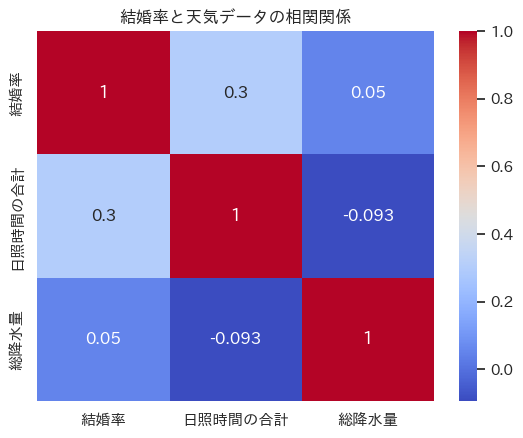

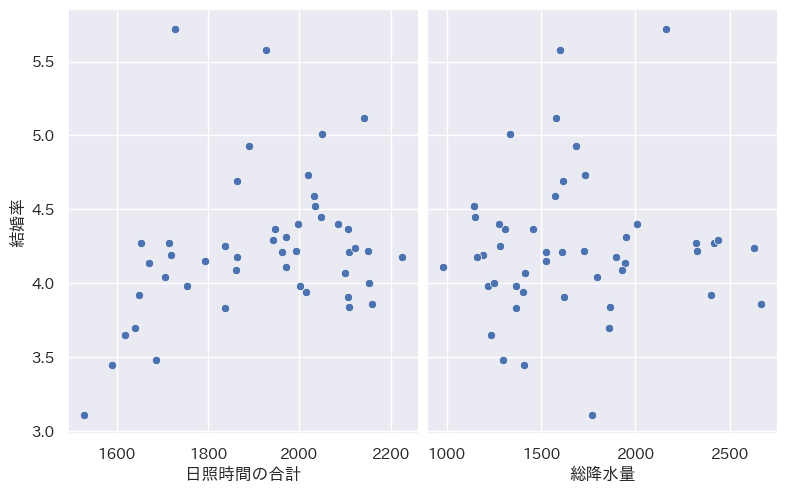

                            OLS Regression Results                            
Dep. Variable:                    結婚率   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.369
Date:                Thu, 18 Jul 2024   Prob (F-statistic):              0.105
Time:                        16:52:33   Log-Likelihood:                -29.803
No. Observations:                  47   AIC:                             65.61
Df Residuals:                      44   BIC:                             71.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5377      0.798      3.181      0.0

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#文字化け回避のための日本語フォント追加文章
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

# 場合によっては必要な文章
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()


# 結婚率のデータ型を確認
print(merged_inner['結婚率'].dtype)

# 結婚率が文字列でパーセント表示されている場合のみ変換
if merged_inner['結婚率'].dtype == 'object':
    merged_inner['結婚率'] = merged_inner['結婚率'].str.rstrip('%').astype('float')

# 相関分析
correlation_matrix = merged_inner[['結婚率', '日照時間の合計', '総降水量']].corr()
print("相関行列:")
print(correlation_matrix)

# ヒートマップで視覚化
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('結婚率と天気データの相関関係')
plt.show()

# 散布図の作成
sns.pairplot(merged_inner, x_vars=['日照時間の合計', '総降水量'], y_vars='結婚率', height=5, aspect=0.8)
plt.show()

# 回帰分析
X = merged_inner[['日照時間の合計', '総降水量']]
y = merged_inner['結婚率']

# 定数項を追加
X = sm.add_constant(X)

# 回帰モデルの適用
model = sm.OLS(y, X).fit()

# 結果の表示
print(model.summary())



**離婚率と気象データの相関図**

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
object
相関行列:
              離婚率   日照時間の合計      総降水量
離婚率      1.000000  0.306265  0.094081
日照時間の合計  0.306265  1.000000 -0.093472
総降水量     0.094081 -0.093472  1.000000


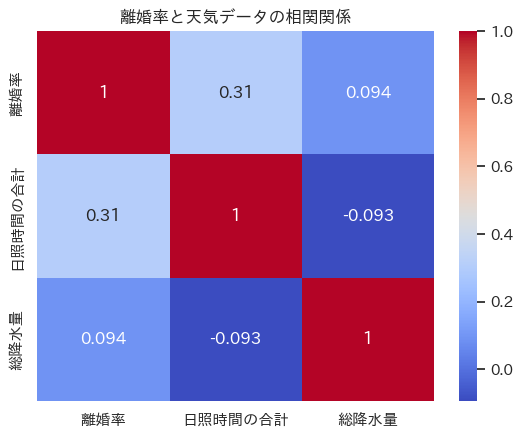

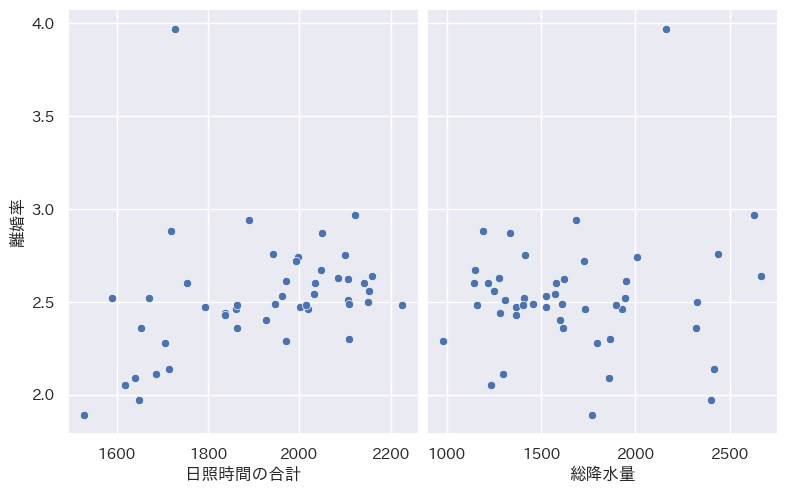

                            OLS Regression Results                            
Dep. Variable:                    離婚率   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.691
Date:                Thu, 18 Jul 2024   Prob (F-statistic):             0.0790
Time:                        16:52:59   Log-Likelihood:                -9.8472
No. Observations:                  47   AIC:                             25.69
Df Residuals:                      44   BIC:                             31.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3205      0.522      2.531      0.0

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#文字化け回避のための日本語フォント追加文章
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

# 場合によっては必要な文章
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()

# 離婚率のデータ型を確認
print(merged_inner['離婚率'].dtype)

# 離婚率が文字列でパーセント表示されている場合のみ変換
if merged_inner['離婚率'].dtype == 'object':
    merged_inner['離婚率'] = merged_inner['離婚率'].str.rstrip('%').astype('float')

# 相関分析
correlation_matrix = merged_inner[['離婚率', '日照時間の合計', '総降水量']].corr()
print("相関行列:")
print(correlation_matrix)

# ヒートマップで視覚化
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('離婚率と天気データの相関関係')
plt.show()

# 散布図の作成
sns.pairplot(merged_inner, x_vars=['日照時間の合計', '総降水量'], y_vars='離婚率', height=5, aspect=0.8)
plt.show()

# 回帰分析
X = merged_inner[['日照時間の合計', '総降水量']]
y = merged_inner['離婚率']

# 定数項を追加
X = sm.add_constant(X)

# 回帰モデルの適用
model = sm.OLS(y, X).fit()

# 結果の表示
print(model.summary())


婚姻件数：特定の期間（通常は1年間）における婚姻の総数。
人口：特定の人口集団の総数。一般的には15歳以上の人口が使用されます。

計算式
結婚率
=(婚姻件数)/
(
15歳以上人口
)
*1000

離婚件数: 特定の期間（通常は1年間）における離婚した件数です。一般的には15歳以上の人口が使用されます。

計算式
離婚率
=(離婚件数)/(大体15歳以上人口(有配偶))



 1mmの降雪を0.1mmの降水量に換算


**結婚率・離婚率の1位と47位のそれぞれの相関関係**

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
結婚率のランキング:


,都道府県,結婚率,離婚率,日照時間の合計,総降水量
結婚率47位,秋田県,3.11,1.89,1527.4,1768.9
結婚率1位,沖縄県,5.72,3.97,1727.1,2161.0


離婚率のランキング:


,都道府県,結婚率,離婚率,日照時間の合計,総降水量
離婚率1位,青森県,3.45,2.52,1589.2,1407.4
離婚率47位,東京都,5.58,2.40,1926.7,1599.0


相関行列:
              結婚率       離婚率   日照時間の合計      総降水量
結婚率      1.000000  0.688814  0.866223  0.505667
離婚率      0.688814  1.000000  0.265813  0.714132
日照時間の合計  0.866223  0.265813  1.000000  0.065391
総降水量     0.505667  0.714132  0.065391  1.000000


NameError: name 'font_prop' is not defined

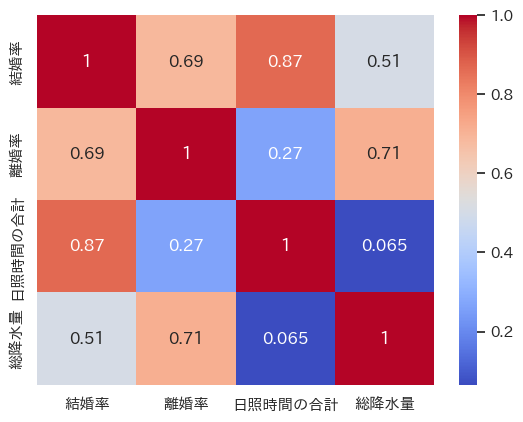

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.font_manager as fm


#文字化け回避のための日本語フォント追加文章
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

# 場合によっては必要な文章
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()

# 結婚率と離婚率を数値に変換
if merged_inner['結婚率'].dtype == 'object':
    merged_inner['結婚率'] = merged_inner['結婚率'].str.rstrip('%').astype('float')
if merged_inner['離婚率'].dtype == 'object':
    merged_inner['離婚率'] = merged_inner['離婚率'].str.rstrip('%').astype('float')

# 対象の都道府県を抽出
marriage_prefectures = ['沖縄県', '秋田県']
divorce_prefectures = ['青森県', '東京都']
marriage_data = merged_inner[merged_inner['都道府県'].isin(marriage_prefectures)]
divorce_data = merged_inner[merged_inner['都道府県'].isin(divorce_prefectures)]

# 結婚率のランキングを表示
marriage_data.index = ['結婚率47位', '結婚率1位']  # 順位を逆にする
print("結婚率のランキング:")
display(marriage_data[['都道府県', '結婚率', '離婚率', '日照時間の合計', '総降水量']])

# 離婚率のランキングを表示
divorce_data.index = ['離婚率1位', '離婚率47位']  # 順位を逆にする
print("離婚率のランキング:")
display(divorce_data[['都道府県', '結婚率', '離婚率', '日照時間の合計', '総降水量']])

# 相関分析
combined_data = pd.concat([marriage_data, divorce_data])
correlation_matrix = combined_data[['結婚率', '離婚率', '日照時間の合計', '総降水量']].corr()
print("相関行列:")
print(correlation_matrix)

# ヒートマップで視覚化
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('結婚率と離婚率の相関関係', fontproperties=font_prop)
plt.show()

# 散布図の作成（結婚率）
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='日照時間の合計', y='結婚率', s=100)
for i, row in combined_data.iterrows():
    plt.text(row['日照時間の合計'], row['結婚率'], row['都道府県'], fontproperties=font_prop)
plt.title('結婚率と日照時間の関係', fontproperties=font_prop)
plt.xlabel('日照時間の合計', fontproperties=font_prop)
plt.ylabel('結婚率', fontproperties=font_prop)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='総降水量', y='結婚率', s=100)
for i, row in combined_data.iterrows():
    plt.text(row['総降水量'], row['結婚率'], row['都道府県'], fontproperties=font_prop)
plt.title('結婚率と総降水量の関係', fontproperties=font_prop)
plt.xlabel('総降水量', fontproperties=font_prop)
plt.ylabel('結婚率', fontproperties=font_prop)
plt.show()

# 散布図の作成（離婚率）
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='日照時間の合計', y='離婚率', s=100)
for i, row in combined_data.iterrows():
    plt.text(row['日照時間の合計'], row['離婚率'], row['都道府県'], fontproperties=font_prop)
plt.title('離婚率と日照時間の関係', fontproperties=font_prop)
plt.xlabel('日照時間の合計', fontproperties=font_prop)
plt.ylabel('離婚率', fontproperties=font_prop)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='総降水量', y='離婚率', s=100)
for i, row in combined_data.iterrows():
    plt.text(row['総降水量'], row['離婚率'], row['都道府県'], fontproperties=font_prop)
plt.title('離婚率と総降水量の関係', fontproperties=font_prop)
plt.xlabel('総降水量', fontproperties=font_prop)
plt.ylabel('離婚率', fontproperties=font_prop)
plt.show()

# 回帰分析（結婚率）
X = combined_data[['日照時間の合計', '総降水量']]
y = combined_data['結婚率']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print('結婚率に関する回帰分析結果:')
print(model.summary())

# 回帰分析（離婚率）
y = combined_data['離婚率']
model = sm.OLS(y, X).fit()
print('離婚率に関する回帰分析結果:')
print(model.summary())